In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
dfc=np.array(pd.read_csv('c:/python/WIOT/columns.csv',sep=';',decimal=',',header=None))[0]
dfc

array(['AUS', 'AUS', 'AUS', ..., 'ROW', 'ROW', 'ROW'], dtype=object)

In [44]:
ll=[]
for el in range(2000,2015):
    #print(el)
    df=pd.read_csv('c:/python/WIOT/'+str(el)+'.csv',sep=';',decimal=',',header=None)
    m1=np.array(df[df.columns[2:]].fillna(0))
    m2=np.sum(m1,axis=0)
    m3=np.sum(m1,axis=1)
    T=np.sum(m2)
    #H1=-K*np.sum(m1/T*np.nan_to_num(np.log2(m1/T)))
    X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
    Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))
    ll.append([el,np.sum(m1.T[dfc=='CHN'].T[df[1]=='CHN']),np.sum(m1.T[dfc=='RUS'].T[df[1]=='RUS']),
               np.sum(m1.T[dfc=='RUS'].T[df[1]=='CHN']),np.sum(m1.T[dfc=='CHN'].T[df[1]=='RUS'])])
ll=np.array(ll).T

In [46]:
ll3=ll[3][-1]*(1.08**np.arange(17))
ll4=ll[4][-1]*(1.08**np.arange(17))
ll11=ll[1][-1]*(1.065**np.arange(17))
ll21=ll[2][-1]*(1.025**np.arange(17))

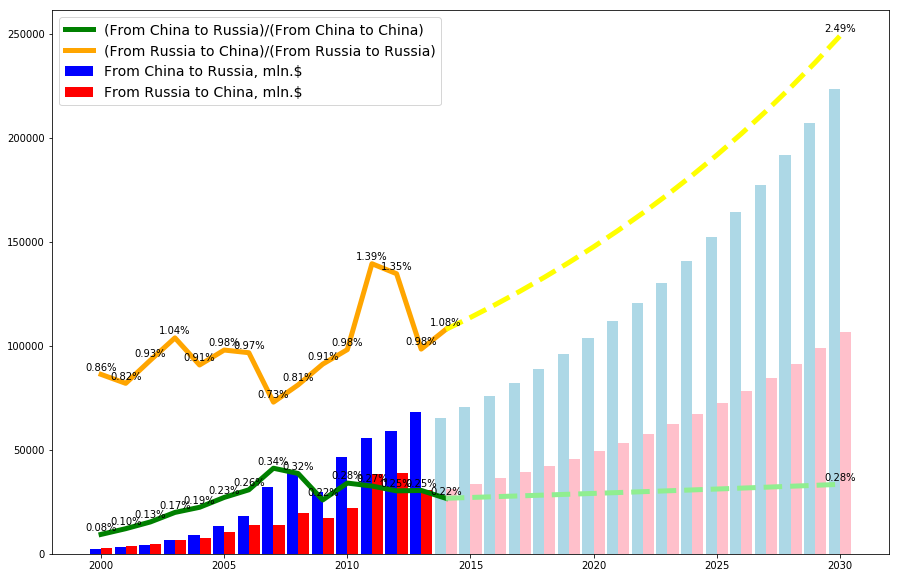

In [47]:
plt.figure(figsize=(15,10))
plt.bar(np.arange(2000,2015)-0.225,ll[3],width=0.45,color='blue')
plt.bar(np.arange(2000,2015)+0.225,ll[4],width=0.45,color='red')
plt.plot(np.arange(2000,2015),ll[3]/ll[1]*12000000,linewidth=5,color='green')
plt.plot(np.arange(2000,2015),ll[4]/ll[2]*10000000,linewidth=5,color='orange')
ll1=ll[3]/ll[1]
ll2=ll[4]/ll[2]
for num,el in enumerate(range(2000,2015)):
    plt.text(el,ll1[num]*12000000+2000,'{:.2%}'.format(ll1[num]),fontsize=10, horizontalalignment='center')
    plt.text(el,ll2[num]*10000000+2000,'{:.2%}'.format(ll2[num]),fontsize=10, horizontalalignment='center')
plt.legend(['(From China to Russia)/(From China to China)','(From Russia to China)/(From Russia to Russia)',
           'From China to Russia, mln.$','From Russia to China, mln.$'],fontsize=14)
plt.bar(np.arange(2014,2031)-0.225,ll3,width=0.45,color='lightblue')
plt.bar(np.arange(2014,2031)+0.225,ll4,width=0.45,color='pink')
plt.plot(np.arange(2014,2031),ll3/ll11*12000000,linewidth=5,color='lightgreen', linestyle = '--')
plt.plot(np.arange(2014,2031),ll4/ll21*10000000,linewidth=5,color='yellow', linestyle = '--')
llk1=(ll3/ll11)[-1]
llk2=(ll4/ll21)[-1]
plt.text(2030,llk1*12000000+2000,'{:.2%}'.format(llk1),fontsize=10, horizontalalignment='center')
plt.text(2030,llk2*10000000+2000,'{:.2%}'.format(llk2),fontsize=10, horizontalalignment='center')

plt.show()

In [37]:
ll=[]
for el in range(2000,2015):
    #print(el)
    df=pd.read_csv('c:/python/WIOT/'+str(el)+'.csv',sep=';',decimal=',',header=None)
    m1=np.array(df[df.columns[2:]].fillna(0)).T[(dfc=='CHN')|(dfc=='RUS')].T[(df[1]=='CHN')|(df[1]=='RUS')]
    m2=np.sum(m1,axis=0)
    m3=np.sum(m1,axis=1)
    T=np.sum(m2)
    #H1=-K*np.sum(m1/T*np.nan_to_num(np.log2(m1/T)))
    X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
    Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))
    dfcc=dfc[(dfc=='CHN')|(dfc=='RUS')]
    ddf1=df[(df[1]=='CHN')|(df[1]=='RUS')][1]
    ll.append([el,np.sum(X1.T[dfcc=='CHN'].T[ddf1=='CHN']),np.sum(X1.T[dfcc=='RUS'].T[ddf1=='RUS']),
               np.sum(X1.T[dfcc=='RUS'].T[ddf1=='CHN']),np.sum(X1.T[dfcc=='CHN'].T[ddf1=='RUS']),
               np.sum(Psi1.T[dfcc=='CHN'].T[ddf1=='CHN']),np.sum(Psi1.T[dfcc=='RUS'].T[ddf1=='RUS']),
               np.sum(Psi1.T[dfcc=='RUS'].T[ddf1=='CHN']),np.sum(Psi1.T[dfcc=='CHN'].T[ddf1=='RUS'])])
ll=np.array(ll).T

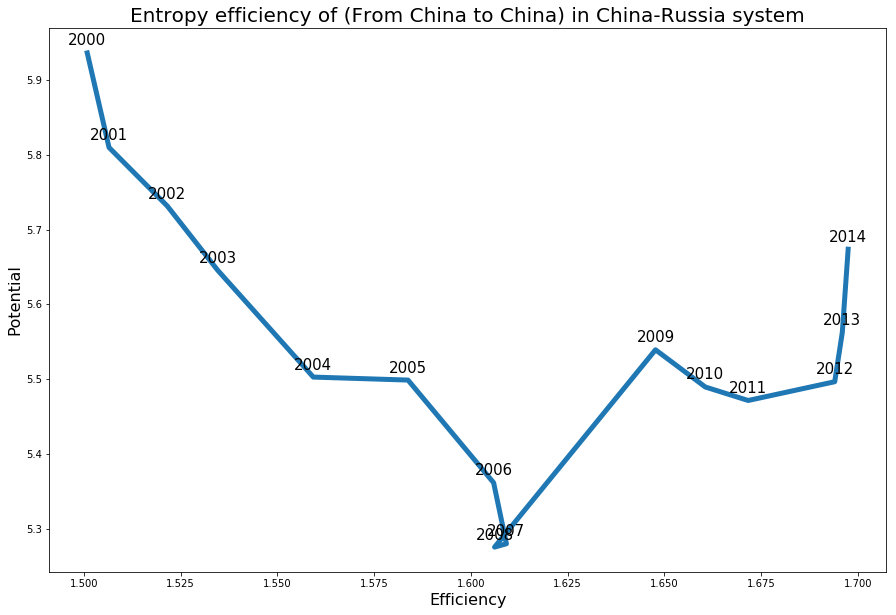

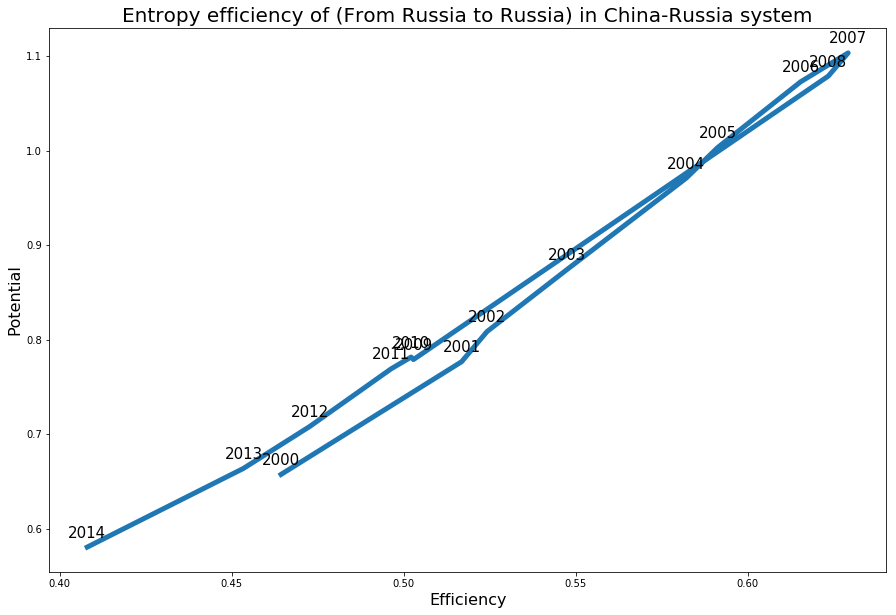

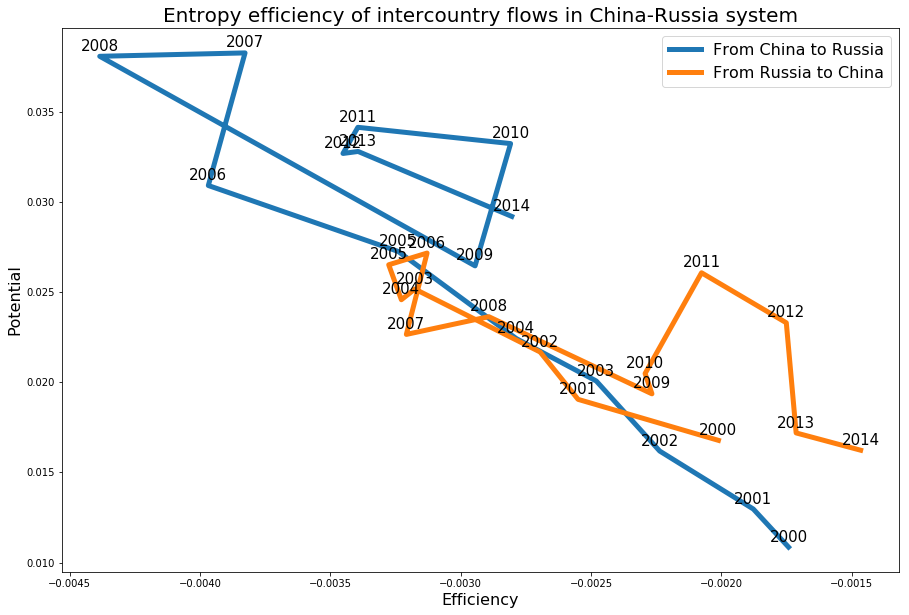

In [38]:
plt.figure(figsize=(15,10))
plt.plot(ll[1],ll[5],linewidth=5)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Entropy efficiency of (From China to China) in China-Russia system',fontsize=20)
for num,el in enumerate(range(2000,2015)):
    plt.text(ll[1][num],ll[5][num]+0.01,el,fontsize=15, horizontalalignment='center')
#plt.plot(ll[2],ll[6],linewidth=5)
#plt.plot(ll[3],ll[7],linewidth=5)
#plt.plot(ll[4],ll[8],linewidth=5)
plt.show()
plt.figure(figsize=(15,10))
#plt.plot(ll[1],ll[5],linewidth=5)
plt.plot(ll[2],ll[6],linewidth=5)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Entropy efficiency of (From Russia to Russia) in China-Russia system',fontsize=20)
for num,el in enumerate(range(2000,2015)):
    plt.text(ll[2][num],ll[6][num]+0.01,el,fontsize=15, horizontalalignment='center')
#plt.plot(ll[3],ll[7],linewidth=5)
#plt.plot(ll[4],ll[8],linewidth=5)
plt.show()
plt.figure(figsize=(15,10))
#plt.plot(ll[1],ll[5],linewidth=5)
#plt.plot(ll[2],ll[6],linewidth=5)
plt.plot(ll[3],ll[7],linewidth=5)
plt.plot(ll[4],ll[8],linewidth=5)
plt.xlabel('Efficiency',fontsize=16)
plt.ylabel('Potential',fontsize=16)
plt.title('Entropy efficiency of intercountry flows in China-Russia system',fontsize=20)
plt.legend(['From China to Russia','From Russia to China'],fontsize=16)
for num,el in enumerate(range(2000,2015)):
    plt.text(ll[3][num],ll[7][num]+0.0003,el,fontsize=15, horizontalalignment='center')
    plt.text(ll[4][num],ll[8][num]+0.0003,el,fontsize=15, horizontalalignment='center')
plt.show()

In [39]:
XX=m1.T[dfcc=='RUS'].T[ddf1=='CHN']
print('From China to Russia:')
df[0][:56][np.sum(XX,axis=0)[:56]>500]

From China to Russia:


0     Crop and animal production, hunting and relate...
3                                  Mining and quarrying
5     Manufacture of textiles, wearing apparel and l...
10      Manufacture of chemicals and chemical products 
12           Manufacture of rubber and plastic products
14                          Manufacture of basic metals
18        Manufacture of machinery and equipment n.e.c.
19    Manufacture of motor vehicles, trailers and se...
23    Electricity, gas, steam and air conditioning s...
26                                         Construction
28    Wholesale trade, except of motor vehicles and ...
30           Land transport and transport via pipelines
50    Public administration and defence; compulsory ...
52              Human health and social work activities
Name: 0, dtype: object

In [40]:
XX=m1.T[dfcc=='CHN'].T[ddf1=='RUS']
print('From Russia to China:')
df[0][:56][np.sum(XX,axis=0)[:56]>500]

From Russia to China:


3                                  Mining and quarrying
9     Manufacture of coke and refined petroleum prod...
10      Manufacture of chemicals and chemical products 
13    Manufacture of other non-metallic mineral prod...
14                          Manufacture of basic metals
23    Electricity, gas, steam and air conditioning s...
26                                         Construction
Name: 0, dtype: object

In [41]:
cr=[0,3,5,10,12,14,18,19,23,26,28,30,50,52]
rc=[3,9,10,13,14,23,26]

In [48]:
ll1=[]
ll2=[]
for el in range(2000,2015):
    #print(el)
    df=pd.read_csv('c:/python/WIOT/'+str(el)+'.csv',sep=';',decimal=',',header=None)
    m1=np.array(df[df.columns[2:]].fillna(0)).T[(dfc=='CHN')|(dfc=='RUS')].T[(df[1]=='CHN')|(df[1]=='RUS')]
    m2=np.sum(m1,axis=0)
    m3=np.sum(m1,axis=1)
    T=np.sum(m2)
    #H1=-K*np.sum(m1/T*np.nan_to_num(np.log2(m1/T)))
    X1=m1/T*np.nan_to_num(np.log2(m1*T/m3.reshape(-1,1)/m2.reshape(1,-1)))
    Psi1=-m1/T*np.nan_to_num(np.log2(m1**2/m3.reshape(-1,1)/m2.reshape(1,-1)))
    dfcc=dfc[(dfc=='CHN')|(dfc=='RUS')]
    ddf1=df[(df[1]=='CHN')|(df[1]=='RUS')][1]
    ll1.append(np.sum(m1.T[dfcc=='RUS'].T[ddf1=='CHN'],axis=0)[cr])
    ll2.append(np.sum(m1.T[dfcc=='CHN'].T[ddf1=='RUS'],axis=0)[rc])
ll1=np.array(ll1).T
ll2=np.array(ll2).T

In [67]:
import datetime
import itertools
import statsmodels.api as sm
import warnings
ff1=pd.DataFrame(np.array([range(16)]).T+2015,columns=['x'])
ff1.index=list(map(lambda x: datetime.datetime(x,1,1,0,0,0),ff1['x']))

In [86]:
tt=len(ll1)
ff=pd.DataFrame(ll1.T,columns=list(map(lambda x: 'c'+str(x+1),range(tt))),
                index=list(map(lambda x: datetime.datetime(x,1,1,0,0,0),range(2000,2015))))
ff['x']=range(2000,2015)
ff['x2']=ff['x']**2

lc=[]
mc=[]
uc=[]
models_c=[]

for el in range(tt):
    ss1='c'+str(el+1)
    ps = range(0, 2) 
    d=1
    qs = range(0, 2) 
    Ps = range(0, 2) 
    D=0
    Qs = range(0, 2) 

    parameters = itertools.product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)
    best_aic = 99999999999
    best_params=(8,1,1,1)
    excl_params=[]
# parameters_list=[(2,2,2,1)]

    warnings.filterwarnings('ignore')

    for param in parameters_list:
        if not (param in excl_params):
            #print (param)
            #try except нужен, потому что на некоторых наборах параметров модель не обучается
            try:
                model=sm.tsa.statespace.SARIMAX(ff[ss1], 
                                        order=(param[0], d, param[1]), 
                                        exog=ff[['x']],
                                        seasonal_order=(param[2], D, param[3], 6)).fit(disp=-1)
            #выводим параметры, на которых модель не обучается и переходим к следующему набору
            except ValueError:
                #print('wrong parameters:', param)
                continue
            aic = model.aic
            #сохраняем лучшую модель, aic, параметры
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
                #print('best parameters: {}. AIC={}'.format(param,aic))
            #results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    res=best_model.get_prediction(start=len(ff), end=len(ff)+15,exog=ff1[['x']])
    models_c.append(res)
    res_lo= res.conf_int(alpha=0.1)['lower '+ss1]
    lc.append(res_lo)
    res_up= res.conf_int(alpha=0.1)['upper '+ss1]
    uc.append(res_up)
    res_mn= res.predicted_mean
    mc.append(res_mn)


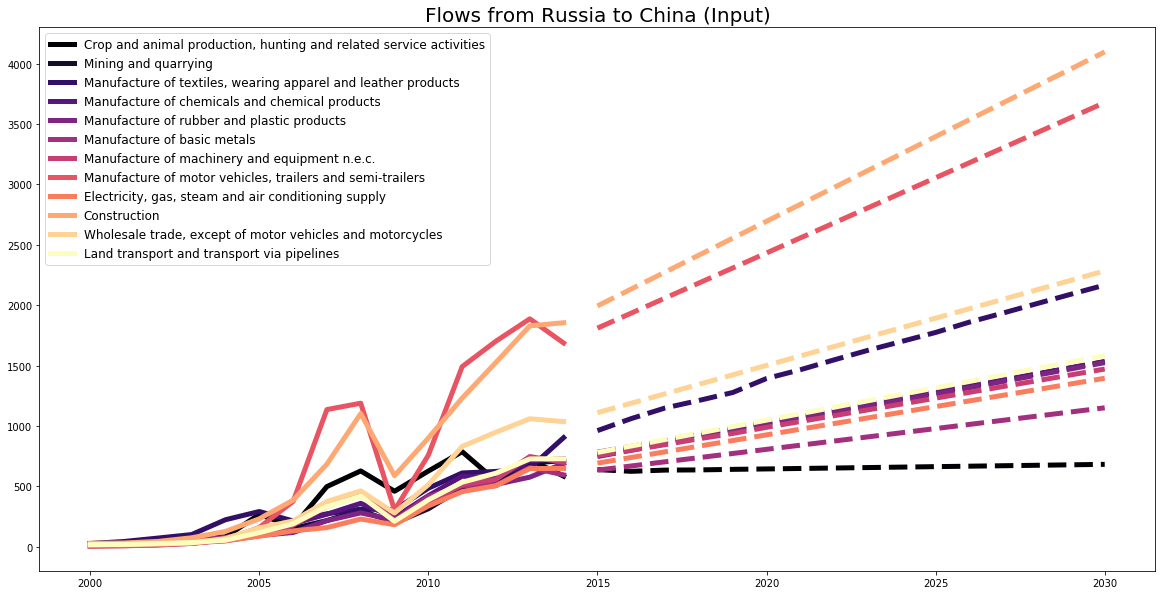

In [87]:
import matplotlib.cm as cm
colors = cm.magma(np.linspace(0, 1, len(ll1)-2))
plt.figure(figsize=(20,10))
for num,el in enumerate(ll1[:-2]):
    plt.plot(range(2000,2015),el,linewidth=5,color=colors[num])
plt.title('Flows from Russia to China (Input)',fontsize=20)
plt.legend(df[0][cr],fontsize=12)
for num,el in enumerate(models_c[:-2]):
    plt.plot(range(2015,2031),el.predicted_mean,linewidth=5,color=colors[num], linestyle = '--')
plt.show()

In [88]:
tt=len(ll2)
ff=pd.DataFrame(ll2.T,columns=list(map(lambda x: 'c'+str(x+1),range(tt))),
                index=list(map(lambda x: datetime.datetime(x,1,1,0,0,0),range(2000,2015))))
ff['x']=range(2000,2015)
ff['x2']=ff['x']**2

lc=[]
mc=[]
uc=[]
models_c=[]

for el in range(tt):
    ss1='c'+str(el+1)
    ps = range(0, 2) 
    d=1
    qs = range(0, 2) 
    Ps = range(0, 2) 
    D=0
    Qs = range(0, 2) 

    parameters = itertools.product(ps, qs, Ps, Qs)
    parameters_list = list(parameters)
    len(parameters_list)
    best_aic = 99999999999
    best_params=(8,1,1,1)
    excl_params=[]
# parameters_list=[(2,2,2,1)]

    warnings.filterwarnings('ignore')

    for param in parameters_list:
        if not (param in excl_params):
            #print (param)
            #try except нужен, потому что на некоторых наборах параметров модель не обучается
            try:
                model=sm.tsa.statespace.SARIMAX(ff[ss1], 
                                        order=(param[0], d, param[1]), 
                                        exog=ff[['x']],
                                        seasonal_order=(param[2], D, param[3], 6)).fit(disp=-1)
            #выводим параметры, на которых модель не обучается и переходим к следующему набору
            except ValueError:
                #print('wrong parameters:', param)
                continue
            aic = model.aic
            #сохраняем лучшую модель, aic, параметры
            if aic < best_aic:
                best_model = model
                best_aic = aic
                best_param = param
                #print('best parameters: {}. AIC={}'.format(param,aic))
            #results.append([param, model.aic])
    
    warnings.filterwarnings('default')
    res=best_model.get_prediction(start=len(ff), end=len(ff)+15,exog=ff1[['x']])
    models_c.append(res)
    res_lo= res.conf_int(alpha=0.1)['lower '+ss1]
    lc.append(res_lo)
    res_up= res.conf_int(alpha=0.1)['upper '+ss1]
    uc.append(res_up)
    res_mn= res.predicted_mean
    mc.append(res_mn)


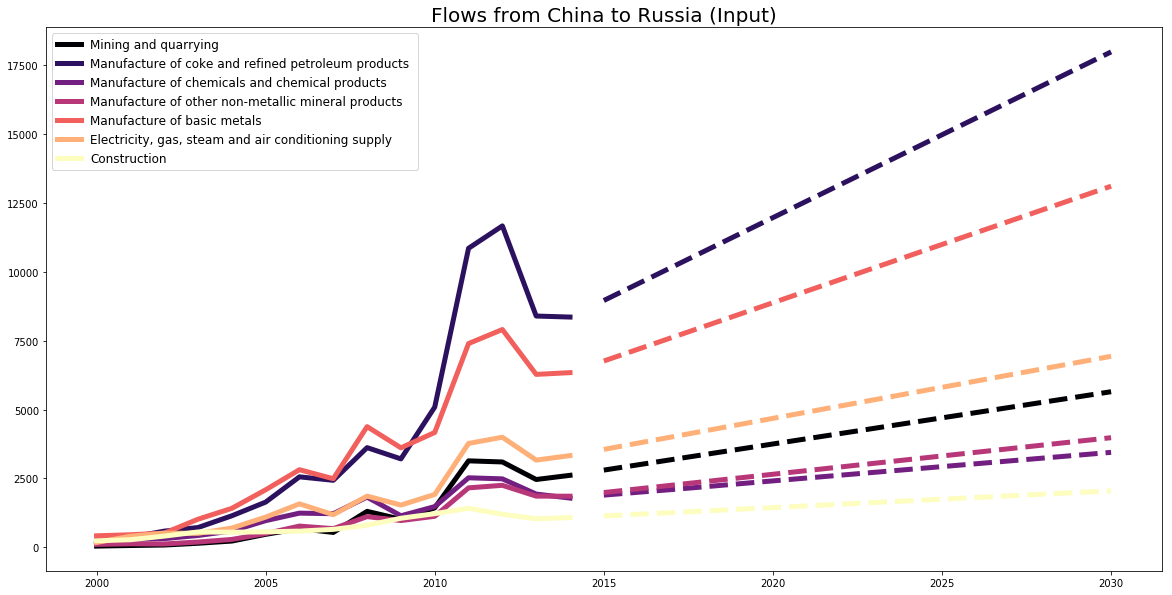

In [91]:
colors = cm.magma(np.linspace(0, 1, len(ll2)))
plt.figure(figsize=(20,10))
for num,el in enumerate(ll2):
    plt.plot(range(2000,2015),el,linewidth=5,color=colors[num])
plt.title('Flows from China to Russia (Input)',fontsize=20)
plt.legend(df[0][rc],fontsize=12)
for num,el in enumerate(models_c):
    plt.plot(range(2015,2031),el.predicted_mean,linewidth=5,color=colors[num], linestyle = '--')
plt.show()